<div align="center" style="font-size:2vw;">
       CSC 859 AI Explainability and Ethics <br> <br>
       San Francisco State University <br> <br>
       Fall 2023 <br> <br>
       Aung Phyo <br> <br>
       Oct 30 2023 <br> <br>
       HW 2
<div>


In [62]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import itertools
from sklearn.model_selection import cross_val_predict, cross_val_score

# <center> Audit of Training database </center>

The training dataset is real data from a biological study. 

The dataset has 871 samples 608 features and 1 target label which is binary 1 for positive result and 0 for negative result. 

All the features columns are numerical and there are no missing data. There is 0.0 value in the features columns 
but it is the actual value and not a missing value. Using the forloop to check the missing data in the dataset, if there are showing True in the dataset, there are missing data. Since, the dataset does not have missing data and all the features columns of the missing data checking values are False. 

There are 781 of 0 label samples and 90 of 1 label samples in the dataset. 

Reference to data source : 
"Aevermann B., Novotny M., Bakken T., Miller J., Diehl A., Osumi-Sutherland D.,
Lasken R., Lein E., Scheuermann R.: “Cell type discovery using single cell
transcriptomics: implications for ontological representation”, Human Molecular Genetics
27(R1): R40-R47 · March 2018"

[Link to the reference to data source](https://academic.oup.com/hmg/article/27/R1/R40/4953379)

In [18]:
data = pd.read_csv('./i1_positive.csv')

print(data.shape)
print("Number of samples: ", data.shape[0])
print("Number of features: ", data.shape[1]-1)
data.head()


(871, 609)
Number of samples:  871
Number of features:  608


,GABRG2,CELF4,SRRM4,SLC1A3,ATP1A3,RBFOX3,GABRA4,NHSL1,GRAMD3,SEZ6L2,...,FERMT1,CSPG4,GJA1,LAMA1,YAP1,LINC00639.2,SMOC1,LINC00498,GFRA1,Label
0,35.038262,161.176004,68.074337,58.063405,20.021864,269.294069,188.205520,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,1.001093,0.0,0.0,0
1,95.324867,75.256474,87.297510,0.000000,18.061554,342.166102,683.328784,0.000000,0.0,1.003420,...,0.0,0.0,0.0,0.0,0.0,0.000000,1.003420,0.0,0.0,0
2,220.143867,187.976727,42.219372,106.553653,0.000000,187.976727,299.556496,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,7.036562,0.000000,0.0,0.0,0
3,166.010840,26.159284,61.373704,0.000000,30.183789,254.549955,446.720079,0.000000,0.0,25.153158,...,0.0,0.0,0.0,0.0,0.0,0.000000,1.006126,0.0,0.0,0
4,188.426220,71.160966,119.269788,57.129226,16.036274,265.600789,287.650666,24.054411,0.0,1.002267,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0


In [19]:
data.isnull()

,GABRG2,CELF4,SRRM4,SLC1A3,ATP1A3,RBFOX3,GABRA4,NHSL1,GRAMD3,SEZ6L2,...,FERMT1,CSPG4,GJA1,LAMA1,YAP1,LINC00639.2,SMOC1,LINC00498,GFRA1,Label
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
867,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
868,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
869,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [20]:
missing_data = data.isnull()

for column in missing_data.columns.values.tolist():
    if 'True' in column:
        print(column)
        print(missing_data[column].value_counts())
        print("")
print("no missing data!")

no missing data!


In [21]:
label_list = data['Label'].value_counts().tolist()

print("0 label samples : ", label_list[0])
print("1 label samples : ", label_list[1])

0 label samples :  781
1 label samples :  90


In [22]:
data.describe()

,GABRG2,CELF4,SRRM4,SLC1A3,ATP1A3,RBFOX3,GABRA4,NHSL1,GRAMD3,SEZ6L2,...,FERMT1,CSPG4,GJA1,LAMA1,YAP1,LINC00639.2,SMOC1,LINC00498,GFRA1,Label
count,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,...,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000
mean,317.195147,160.794717,188.372969,263.524808,79.262833,137.275239,229.995772,52.507171,59.435549,41.151089,...,10.664136,2.557719,31.528201,14.410798,11.514892,7.873938,24.349328,4.727715,4.940665,0.103330
std,378.241239,189.064895,208.232294,999.259112,127.012517,264.213953,245.183809,232.926742,291.806179,80.825275,...,99.005377,29.264949,221.308620,91.880695,81.364902,79.936480,113.287913,37.848376,32.248300,0.304564
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,38.894340,32.084673,35.094833,0.000000,4.019327,14.288171,33.733073,0.000000,0.000000,1.001922,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,218.427681,108.811797,130.794368,0.000000,29.073964,73.962624,181.287669,0.000000,0.000000,5.080387,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,440.087971,218.480061,265.911406,6.031598,100.142130,169.816497,334.398305,0.000000,1.005632,47.306796,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.014025,0.000000,0.000000,0.000000
max,3435.333490,2011.629811,1704.202638,10950.762140,1293.563390,6061.307927,2058.199518,2331.740949,4900.202343,839.058368,...,2086.435931,685.510866,3557.887531,1486.017423,1660.938508,1949.849508,2147.133231,513.075890,530.991217,1.000000


# <center> SW tools </center>

The software tools that I used for the project are : 

* jupyter notebook for software running environment and text documentation <br><br>

* python programming language <br><br>

* pandas python library to transform the dataset into the data frame <br><br>

* numpy python library for numerical, and basic statistics calculation <br><br>

* scikit-learn python library for the machine learning models <br><br>

* matplotlib to show the plot, graph and visualization <br><br>


For the data processing, I separated the features columns and class label columns. The dataset has label which is the class label either 0 or 1. Fearutes columns are all the columns except the label and all have the numerical data and there are no missing values.  

The reason for separating the features columns and the label is to split the dataset to train and test the machine learning model. In this project, I am going to use the Random Forest Classification machine learning model.  

In [23]:
features = data.drop(columns=["Label"])
Y = data["Label"]

print(features.shape)
print(Y.shape)
print(len(features.columns))

(871, 608)
(871,)
608


In [24]:
features.head()

,GABRG2,CELF4,SRRM4,SLC1A3,ATP1A3,RBFOX3,GABRA4,NHSL1,GRAMD3,SEZ6L2,...,PRODH,FERMT1,CSPG4,GJA1,LAMA1,YAP1,LINC00639.2,SMOC1,LINC00498,GFRA1
0,35.038262,161.176004,68.074337,58.063405,20.021864,269.294069,188.205520,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.001093,0.0,0.0
1,95.324867,75.256474,87.297510,0.000000,18.061554,342.166102,683.328784,0.000000,0.0,1.003420,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.003420,0.0,0.0
2,220.143867,187.976727,42.219372,106.553653,0.000000,187.976727,299.556496,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,7.036562,0.000000,0.0,0.0
3,166.010840,26.159284,61.373704,0.000000,30.183789,254.549955,446.720079,0.000000,0.0,25.153158,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.006126,0.0,0.0
4,188.426220,71.160966,119.269788,57.129226,16.036274,265.600789,287.650666,24.054411,0.0,1.002267,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0


In [25]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Label, dtype: int64

### Spliting the dataset for test set and train set

Splitting the dataset into train set and test set, in this splitting, I used 30% of the whole data set as a test size which is a random 30% of the dataset and the other random 70% of the dataset will be used as a training set to train the model.

In [33]:
x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size=0.3, random_state=1)

# <center> Experimental Methods and Setup <center>
 To get the best machine learning model accuracy, I am going to test the model with 3 different ntree values and 
 3 different mtry values with setting the oob_score to True. And then, I am going to compare the f1 score to choose  the best model.  
    
 * ntree = 500, mtry = 12, oob_score = True <br><br>
    
 * ntree = 500, mtry = 24, oob_score = True <br><br>
    
 * ntree = 500, mtry = 49, oob_score = True <br><br>
    
 * ntree = 1000, mtry = 12, oob_score = True <br><br>
    
 * ntree = 1000, mtry = 24, oob_score = True <br><br>
    
 * ntree = 1000, mtry = 49, oob_score = True <br><br>
    
 * ntree = 5000, mtry = 12, oob_score = True <br><br>
    
 * ntree = 5000, mtry = 24, oob_score = True <br><br>
    
 * ntree = 5000, mtry = 49, oob_score = True <br><br>

I am going to try with 9 different combination of 3 different ntree and 3 different mtry, which are 500, 1000, 5000 for ntree and 12, 24, 49 for the mtry. The different mtry values are coming from half squre root of total number of features, square root of the total number of features, and double square root of the total number of features. And then, I build the model with each combination and train the model and then calculated the f1 score for each different combination of the model. 
    
### Comparing F1_Scores to choose the best model

After getting the f1 scores, I sorted by the scores in assending order, the best f1 scores are the combination of 500 ntree, 49 mtry; 1000 ntree, 49 mtry; and 5000 ntree, 49 mtry. Since the random forest model used the random decision tree and over a 1000 tree the accuracy not become much more different, so I picked the combination of 5000 ntree and 49 mtry as the best model. 

In [52]:
sqrt_number_of_features = np.sqrt(len(features.columns))
m1 = int(0.5 * sqrt_number_of_features)
m2 = int(sqrt_number_of_features)
m3 = int(2 * sqrt_number_of_features)

ntree = [500, 1000, 5000]
mtry = [m1, m2, m3]
f1_list = []


# ntree 500 , mtry 12
RF1 = RandomForestClassifier(n_estimators=ntree[0], max_features=mtry[0], oob_score=True)
RF1.fit(x_train, y_train)
predict1 = RF1.predict(x_test)
f1 = f1_score(y_test, predict1, average='weighted')
f1_list.append(f1)


# ntree 500 , mtry 24
RF2 = RandomForestClassifier(n_estimators=ntree[0], max_features=mtry[1], oob_score=True)
RF2.fit(x_train, y_train)
predict2 = RF2.predict(x_test)
f1 = f1_score(y_test, predict2, average='weighted')
f1_list.append(f1)


# ntree 500 , mtry 49
RF3 = RandomForestClassifier(n_estimators=ntree[0], max_features=mtry[2], oob_score=True)
RF3.fit(x_train, y_train)
predict3 = RF3.predict(x_test)
f1 = f1_score(y_test, predict3, average='weighted')
f1_list.append(f1)


# ntree 1000 , mtry 12
RF4 = RandomForestClassifier(n_estimators=ntree[1], max_features=mtry[0], oob_score=True)
RF4.fit(x_train, y_train)
predict4 = RF4.predict(x_test)
f1 = f1_score(y_test, predict4, average='weighted')
f1_list.append(f1)


# ntree 1000 , mtry 24
RF5 = RandomForestClassifier(n_estimators=ntree[1], max_features=mtry[1], oob_score=True)
RF5.fit(x_train, y_train)
predict5 = RF5.predict(x_test)
f1 = f1_score(y_test, predict5, average='weighted')
f1_list.append(f1)


# ntree 1000 , mtry 49
RF6 = RandomForestClassifier(n_estimators=ntree[1], max_features=mtry[2], oob_score=True)
RF6.fit(x_train, y_train)
predict6 = RF6.predict(x_test)
f1 = f1_score(y_test, predict6, average='weighted')
f1_list.append(f1)


# ntree 5000 , mtry 12
RF7 = RandomForestClassifier(n_estimators=ntree[2], max_features=mtry[0], oob_score=True)
RF7.fit(x_train, y_train)
predict7 = RF7.predict(x_test)
f1 = f1_score(y_test, predict7, average='weighted')
f1_list.append(f1)


# ntree 5000 , mtry 24
RF8 = RandomForestClassifier(n_estimators=ntree[2], max_features=mtry[1], oob_score=True)
RF8.fit(x_train, y_train)
predict8 = RF8.predict(x_test)
f1 = f1_score(y_test, predict8, average='weighted')
f1_list.append(f1)


# ntree 5000 , mtry 49
RF9 = RandomForestClassifier(n_estimators=ntree[2], max_features=mtry[2], oob_score=True)
RF9.fit(x_train, y_train)
predict9 = RF9.predict(x_test)
f1 = f1_score(y_test, predict9, average='weighted')
f1_list.append(f1)


### Comparing f1_scores

In [53]:
df = pd.DataFrame({'F1_Scores':f1_list}, index=["500 ntree, 12 mtry", "500 ntree, 24 mtry", "500 ntree, 49 mtry",
                                   "1000 ntree, 12 mtry", "1000 ntree, 24 mtry", "1000 ntree, 49 mtry",
                                   "5000 ntree, 12 mtry", "5000 ntree, 24 mtry", "5000 ntree, 49 mtry"])
df = df.sort_values(by=['F1_Scores'])
df

,F1_Scores
"500 ntree, 12 mtry",0.971571
"1000 ntree, 12 mtry",0.975870
"1000 ntree, 24 mtry",0.975870
"5000 ntree, 12 mtry",0.975870
"1000 ntree, 49 mtry",0.980437
"500 ntree, 24 mtry",0.984210
"5000 ntree, 24 mtry",0.984210
"5000 ntree, 49 mtry",0.984483
"500 ntree, 49 mtry",0.988262


# <center> Results of RF Training and Accuracy Estimates </center>

I am choosing the ntree = 5000, mtry = 49 and oob_score=False to build the best model. 

And then, showing the confusion matrix, accuracy, recall, precision and f1 score. 

Precision is a measure of the accuracy provided that a class label has been predicted. 
It is defined by: precision = TP/(TP + FP)

Recall is the true positive rate.
It is defined as: Recall = TP/(TP + FN)

Trying to compare OOB error and cross validation error by trining the model with the full dataset. 

Getting the values of OOB Error : 0.0161 by showing four decimal places. 

Getting the values of Cross Validation Error : 0.0172 by showing four decimal places. 

The error values are very similar but the difference is 0.0011 

In [54]:
RF_Model = RandomForestClassifier(n_estimators=5000, max_features=49, oob_score=False)
RF_Model.fit(x_train, y_train)

RandomForestClassifier(max_features=49, n_estimators=5000)

In [55]:
predict = RF_Model.predict(x_test)

In [56]:
f1 = f1_score(y_test, predict, average='weighted')
f1

0.9844825823061977

## Perform k-fold cross-validation and obtain predictions

In [57]:
Y_Pred = cross_val_predict(RF_Model, features, Y, cv=3)

In [58]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(Y, Y_Pred, labels=[1,0]))

[[ 77  13]
 [  2 779]]


Confusion matrix, without normalization
[[ 77  13]
 [  2 779]]


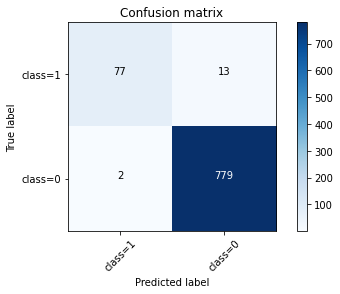

In [59]:
c_matrix = confusion_matrix(Y, Y_Pred, labels=[1,0])

plt.figure()
plot_confusion_matrix(c_matrix, classes=['class=1','class=0'], normalize=False, title='Confusion matrix')

In [60]:
print(classification_report(Y, Y_Pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       781
           1       0.97      0.86      0.91        90

    accuracy                           0.98       871
   macro avg       0.98      0.93      0.95       871
weighted avg       0.98      0.98      0.98       871



### Showing OOB error from full training phase and compare it with error from CV.

In [63]:
RF_OOB = RandomForestClassifier(n_estimators=5000, max_features=49, oob_score=True)

RF_OOB.fit(features, Y)

oob_error = 1 - RF_OOB.oob_score_

print(f"OOB Error : {oob_error: .4f}")

cv_scores = cross_val_score(RF_OOB, features, Y, cv=3)

cv_error = 1 - cv_scores.mean()

print(f"CV Error: {cv_error: .4f}")

OOB Error :  0.0161
CV Error:  0.0172


# <center> Feature Ranking </center>


The top 10 ranked features are COL5A2, COL5A2.2, COL5A2.1, NDNF.1, NDNF, NDNF.2, SST, FAT1, TOX3.1, TOX3.2 and the first rank is COL5A2 with the important value of 0.07252

From the reference paper: I1 cluster: A human MTG cortical layer 1 GABAergic interneuron that selectively expresses
COL5A2 and NDNF and FAT1 mRNAs, which is biologically developed ground truth. 

In the top 10 ranked features all of those three mRNAs are included and the trained model can be pretty much reliabled according to the top features ranking and its accuracy.  


I would like to suggest to used like a least 8 or all of the top 10 features in production because in 8 out of top 10 ranked features included COL5A2, NDNF and FAT1 which are the features of biologically developed ground truth and also the more fuatures , the prediction of the model can be more accurate.

COL5A2 : 0.07252
COL5A2.2 : 0.06903
COL5A2.1 : 0.06503
NDNF.1 : 0.04268
NDNF : 0.03912
NDNF.2 : 0.03670
SST : 0.03477
FAT1 : 0.03124
TOX3.1 : 0.02573
TOX3.2 : 0.02524


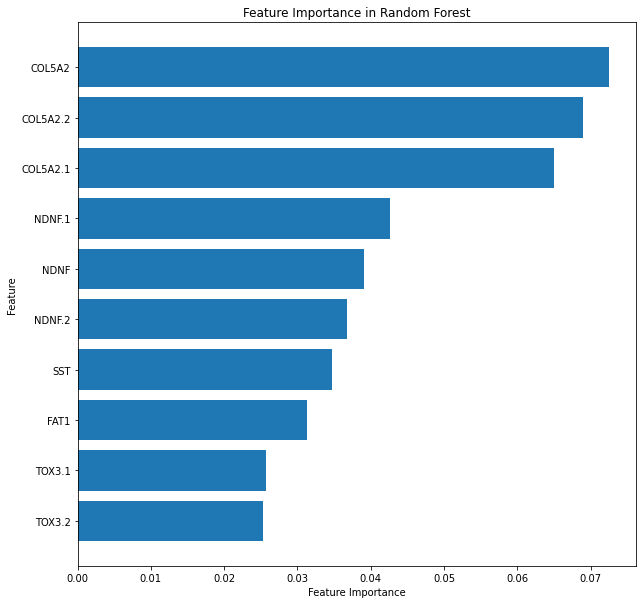

In [111]:
feature_importances = RF_Model.feature_importances_

feature_names = features.columns

feature_importance_dict = dict(zip(feature_names, feature_importances))

sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

sorted_feature_importance = sorted_feature_importance[0:10]

for feature, importance in sorted_feature_importance:
    print(f"{feature} : {importance:.5f}")

sorted_feature_importance = reversed(sorted_feature_importance)

plt.figure(figsize=(10, 10))
plt.barh(*zip(*sorted_feature_importance))
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest')
plt.show()

# <center> RF Run Time Test </center>

I have tested with 2 random sample, one is class 1 sample and the other is class 0 sample. 

The prediction probabilites for sample1 are 0.122 for class 0 and 0.878 for class 1. 

The truth label is 1 for the sample 1 and the probability is more on class 1. 

The prediction probabilities for sample2 are 0.997 for class 0 and 0.003 for class 1. 

The truth label is 0 for the sample 2 and the probability is more on class 0. 

Both samples prediction are correct and the prediction probabilities for class 0 sample is a lot higher than compared with the class 1 sample precdication. 

In the dataset the total samples of class 0 is 781 and the total samples of class 1 is 90, so that is the reason for the prediction probabilities is more on class 0 samples and the model can be able to predict more accurate on class 0 sample than class 1 samples because the model has been trained with more class 0 samples than class 1 samples.  


In [133]:
# label 1
sample1 = features[403:404]

# label 0
sample2 = features[389:390] 

prob1 = RF_Model.predict_proba(sample1)

prob2 = RF_Model.predict_proba(sample2)


print("Class Probabilities (0 and 1) for sample1: ", prob1)
print("Class Probabilities (0 and 1) for sample2: ", prob2)


Class Probabilities (0 and 1) for sample1:  [[0.122 0.878]]
Class Probabilities (0 and 1) for sample2:  [[0.997 0.003]]


# References and resources

* Jupyter
* Python library scikit-learn, pandas, numpy, matplotlib

### Papers

* [Link](https://academic.oup.com/hmg/article/27/R1/R40/4953379)


### Aung Phyo